## Evaluating Computational Performance


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
filename = r'..\output\_beta_sensitivity_6\run_optimizaton_b=0.501_Oct-25_17.08\perf.csv'

In [9]:
df = pd.read_csv(filename, header=0)
num_measurements = df.shape[0]
cat_data = {}
pointer = 0
while df.shape[0] > 0:
    category = df['desc'][pointer]
    mask = df['desc']==category
    diff_time = df['diff. time (s)'][mask]
    cat_data[category] = diff_time.to_numpy()
    df = df[~mask]
    pointer += 1

avg_times = {}
tot_times = {}

for cat, values in cat_data.items():
    values = np.nan_to_num(values)
    avg_times[cat] = np.average(values)
    tot_times[cat] = np.sum(values)

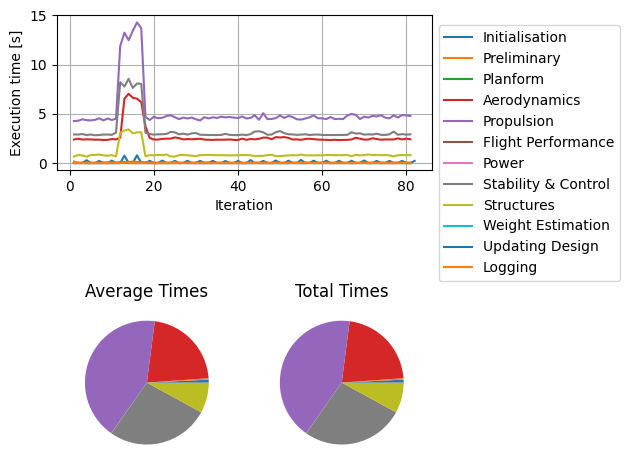

In [11]:
# All Plots
ax1 = plt.subplot(211)
for cat, values in cat_data.items():
    x_arr = np.linspace(1, values.size, values.size)
    ax1.plot(x_arr, values, label=cat)

ax1.set_xlabel('Iteration')
ax1.set_ylabel('Execution time [s]')
ax1.legend(bbox_to_anchor=(1, 0.98), loc='upper left')
ax1.grid()

ax2 = plt.subplot(223)
ax2.pie(avg_times.values())
ax2.set_title('Average Times')

ax3 = plt.subplot(224)
ax3.pie(tot_times.values())
ax3.set_title('Total Times')

fig = plt.gcf()
fig.tight_layout()

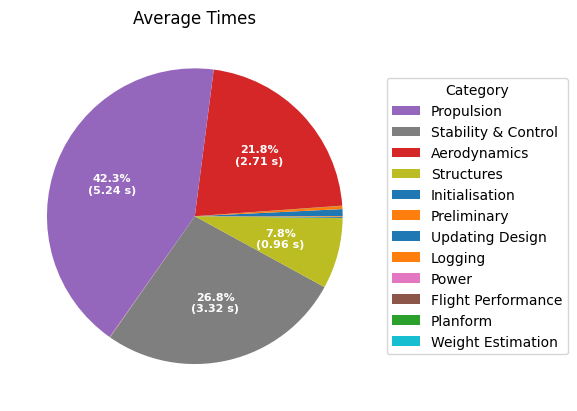

In [12]:
# Better pie chart
data = avg_times
label = "Average Times"
times = np.array(list(data.values()))
categ = np.array(list(data.keys()))

fig, ax = plt.subplots()

def func(pct, allvals):
    absolute = pct/100.*np.sum(allvals)
    if absolute > 0.5: return f"{pct:.1f}%\n({absolute:.2f} s)"
    else:            return None


wedges, texts, autotexts = ax.pie(times, autopct=lambda pct: func(pct, times),
                                  textprops=dict(color="w"))

sort_idx = np.argsort(times)[-1::-1]

ax.legend(np.array(wedges)[sort_idx], categ[sort_idx],
          title="Category",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title(label)

plt.show()